In [1]:
!pip install fasttext
!pip install numpy
from scipy.spatial.distance import cosine
import numpy as np # if it doen't work, just install numpy -> pip install numpy
from sklearn.manifold import TSNE # if it doen't work, just install sklearn -> pip install sklearn
import matplotlib.pyplot as plt # if it doen't work, just install matplotlib -> pip install matplotlib
import random # if it doen't work, just install random -> pip install random
import fasttext


In [2]:

# Replace with the path to your dataset
dataset_path = '/PATH TO THE AJA DATASET/'

# Training the model
model = fasttext.train_unsupervised(dataset_path, model='skipgram')

# Saving the model
model.save_model('/PATH TO YOUR MODEL/model.bin')


Read 0M words
Number of words:  58
Number of labels: 0
Progress: 100.0% words/sec/thread:   12591 lr:  0.000000 avg.loss:  4.126940 ETA:   0h 0m 0s


In [3]:
model = fasttext.load_model('/PATH TO YOUR MODEL/model.bin')
print(model.get_word_vector('eshi'))

[-2.0339319e-03  4.7240802e-04  2.5347557e-03  5.7691499e-04
 -3.1456896e-04  1.1223979e-04 -4.3745022e-04  1.4335854e-03
 -8.2749937e-04  4.3664474e-04 -1.1498362e-03 -5.0623621e-05
 -2.3404502e-03 -6.3635845e-04 -6.4255315e-04  4.1401931e-04
 -1.5510971e-03 -5.7767454e-04  2.1722224e-03  5.2441732e-04
 -6.8149419e-04  1.9498520e-03 -1.4220983e-03 -3.0321145e-04
  9.8892616e-04  1.6735385e-03 -8.9142733e-04 -7.6708628e-04
  7.1424077e-04  1.0667223e-03  4.3428587e-04 -4.4292202e-03
  1.1723604e-03  3.6361176e-04 -2.6342657e-03  1.1838977e-03
  1.4931957e-03  2.8348996e-04 -2.8811630e-03  1.1293950e-03
  8.6226495e-04 -1.4181128e-04  2.1619208e-03  2.5361693e-03
  1.1620125e-03 -5.9196883e-04  1.9511186e-03  9.0120028e-04
 -1.6652761e-03 -3.7716676e-03  1.8032423e-03  1.1505198e-03
 -7.4267091e-04 -2.8571298e-03 -8.1163010e-04 -2.3272366e-03
  1.0923486e-03  1.5022405e-03  4.2643753e-04 -6.5285497e-04
 -2.6145473e-03  2.7600236e-03  5.5915694e-04  9.7877183e-04
 -7.0813065e-04 -1.53969

In [4]:
# Display the most similar words to the one you input
similar_words = model.get_nearest_neighbors('aja', k=3)  # k is the number of top similar words you want
for score, word in similar_words:
    print(f"Word: {word}, Similarity: {score}")


Word: ajagbe, Similarity: 0.34880366921424866
Word: sɔ, Similarity: 0.3193800151348114
Word: va, Similarity: 0.24484875798225403


In [5]:

def word_similarity(word1, word2, model):
    # Cosine similarity is 1 - cosine distance
    return 1 - cosine(model.get_word_vector(word1), model.get_word_vector(word2))

similarity = word_similarity('eshi', 'ezo', model)
print(f"Cosine similarity between 'eshi' and 'ezo si': {similarity}")


Cosine similarity between 'eshi' and 'ezo si': -0.1609410047531128


In [6]:
# Measuring distance between 2 words - High cosine similarity implies high dissimilarities

from scipy.spatial.distance import cosine

def word_distance(word1, word2, model):
    return cosine(model.get_word_vector(word1), model.get_word_vector(word2))


distance = word_distance('efio', 'efio si', model)
print(f"Distance between 'efio' and 'efio si': {distance}")


Distance between 'efio' and 'efio si': 0.354997456073761


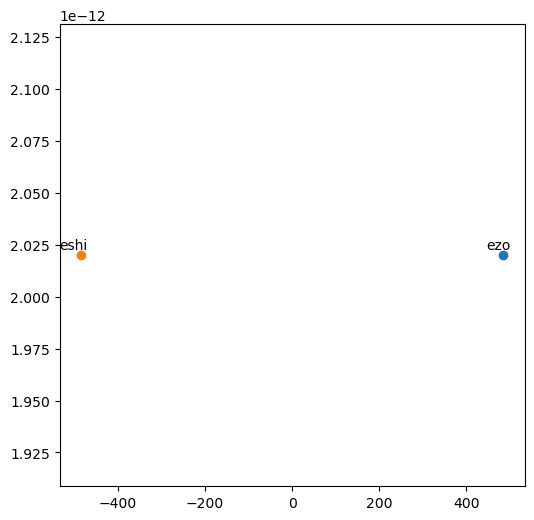

In [7]:


# Load your model
model = fasttext.load_model('/PATH TO YOUR MODEL/model.bin')

# Extract vectors
words = ['ezo', 'eshi']  # Add other words as needed
vectors = np.array([model.get_word_vector(word) for word in words])

# Dimensionality Reduction using t-SNE
# Assuming you have 3 words
tsne = TSNE(n_components=2, random_state=0, perplexity=1)
vectors_2d = tsne.fit_transform(vectors)

# Visualization
plt.figure(figsize=(6, 6))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()
